In [2]:
from os.path import dirname, join as pjoin
import scipy.io as sio

In [5]:
path = '/home/kaled/NeuroMat/Clustering/NeuroMat_Clustering_EEG'
data_dir = pjoin(dirname(sio.__file__), 'matlab', path)
mat_fname = pjoin(data_dir, 'Result_Origin_Ter_E_9 10_11.mat')

In [6]:
mat_contents = sio.loadmat(mat_fname)

In [7]:
mat_u = mat_contents['mat_u']

In [8]:
mat_bool = []
for el in mat_u:
    el_bool = []
    for row_el in el:
        row_bool = []
        for rc_el in row_el:
            if rc_el < 276:
                row_bool.append(1)
            else:
                row_bool.append(0)
        el_bool.append(row_bool)
    mat_bool.append(el_bool)

In [9]:
from igraph import *
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import networkx as nx

In [11]:
G = nx.Graph()

In [12]:
import pandas as pd
import networkx as nx

In [13]:
triad_labels = ['000', '100', '200', '210', '020', '120', '001', '101', '021', '121', '002', '012']

In [14]:
mat_bool_DF = pd.DataFrame(mat_bool[0])

In [15]:
mat_bool[0]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [16]:
from_arr = []
to_arr = []

In [17]:
for i in range(len(mat_bool[0])):
    for j in range(len(mat_bool[0][0])):
        if (mat_bool[0][i][j] == 1):
            from_arr.append(triad_labels[i])
            to_arr.append(triad_labels[j])

In [18]:
df = pd.DataFrame({ 'from':from_arr, 'to':to_arr})

In [19]:
G=nx.from_pandas_edgelist(df, 'from', 'to')

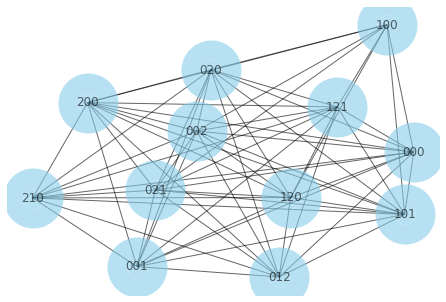

In [22]:
nx.draw(G, node_size=400, alpha=0.6, linewidths=40, node_color="skyblue", with_labels=True, figsize=(18,18))
plt.savefig("plot.png", dpi=1000)
plt.show()